# **Библиотеки для визуализации данных (Matplotlib, Seaborn)**
Для начала установим и подключим библиотеки

In [ ]:
!pip install matplotlib

In [ ]:
!pip install seaborn

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Matplotlib

Построим простейший график по точкам

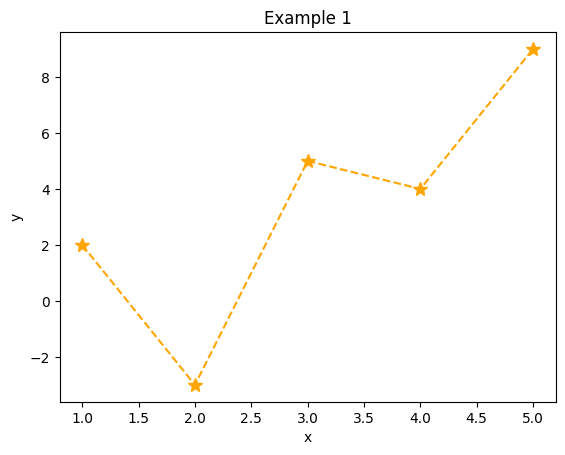

In [ ]:
x = [1, 2, 3, 4, 5]
y = [2, -3, 5, 4, 9]
plt.plot(x, y, color='orange', linestyle='--', marker='*', markersize=10)
plt.title('Example 1') # название графика
plt.xlabel('x') # название оси x
plt.ylabel('y') # название оси y
plt.show() # показать график (в Jupyter-ноутбуках вызывается автоматически, поэтому можно не писать)

linestyle (стиль начертания линий графика):


*   `'-'` - непрерывная линия
*   `'--'` - штриховая линия
*   `'-.'` - штрихпунктирная линия
*   `':'` - пунктирная линия
*   `''` или `'None'` - без рисования линии



Цвет линий можно задавать написав одну букву в форматную строку после стиля линий: `'--r'` - красная штриховая линия. Для обозначения одной буквой есть ограниченное количество цветов, через параметр color можно задавать любой цвет в 16-ричной системе или через кортеж из трех чисел - RGB запись цвета.

marker (стиль начертания маркеров):


*   `'o'` - круг
*   `'s'` - квадрат
*   `'V'` - треугольник вершиной вниз
*   `'^'` - треугольник вершиной вверх
*   `'*'` - звезда



Стиль маркеров можно задать через параментр маркер или добавить нужную букву в форматную строку.

Можно также менять толщину линий (linewidth), размер маркеров (markersize), цвет заливки маркеров (markerfacecolor) и т.д.

Про все параметры `plt.plot()` можно прочесть в официальной документации библиотеки [тут](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html).

Чтобы сделать точечную диаграмму воспользуемся `plt.scatter()`

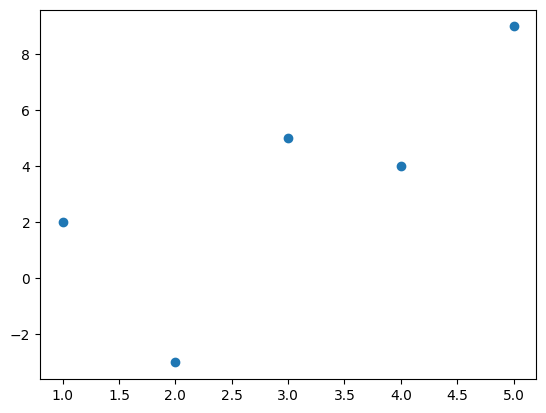

In [ ]:
plt.scatter(x, y)

Построим график функций `sin(x)` и `cos(x)`

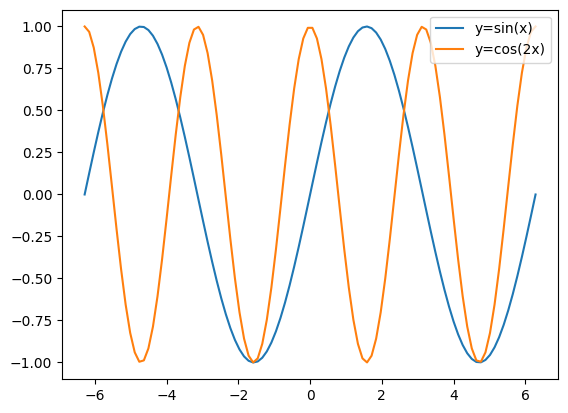

In [ ]:
x = np.linspace(-np.pi * 2, np.pi * 2, 100)
plt.plot(x, np.sin(x), label='y=sin(x)')
plt.plot(x, np.cos(2 * x), label='y=cos(2x)')
plt.legend() # показывать легенду

1. Известно сколько студентов ПМИ на какую из специализаций собираются пойти. Отразите эти данные в столбчатой и круговой диаграммах

Text(0, 0.5, 'Количество студентов')

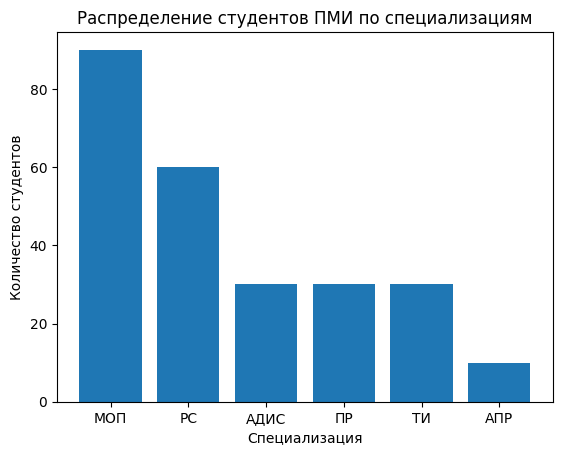

In [ ]:
x = ["МОП", "РС", "АДИС", "ПР", "ТИ", "АПР"]
y = [90, 60, 30, 30, 30, 10]

plt.bar(x, y)
plt.title('Распределение студентов ПМИ по специализациям')
plt.xlabel('Специализация')
plt.ylabel('Количество студентов')

Text(0.5, 1.0, 'Распределение студентов ПМИ по специализациям')

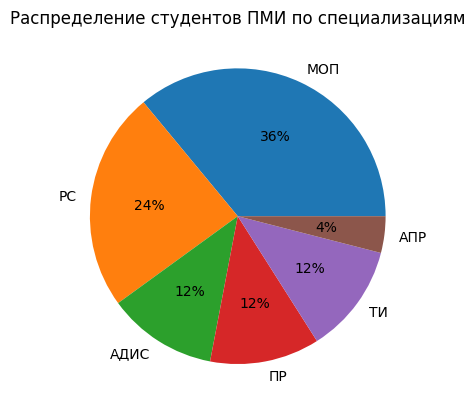

In [ ]:
plt.pie(y, labels=x, autopct='%1.f%%')
plt.title('Распределение студентов ПМИ по специализациям')

Попробуем сделать гистограмму, посмотрим на нормальное распределение

(array([ 15.,  43., 130., 195., 263., 205., 112.,  26.,   9.,   2.]),
 array([-3.00802817, -2.33666015, -1.66529212, -0.99392409, -0.32255607,
         0.34881196,  1.02017998,  1.69154801,  2.36291604,  3.03428406,
         3.70565209]),
 <BarContainer object of 10 artists>)

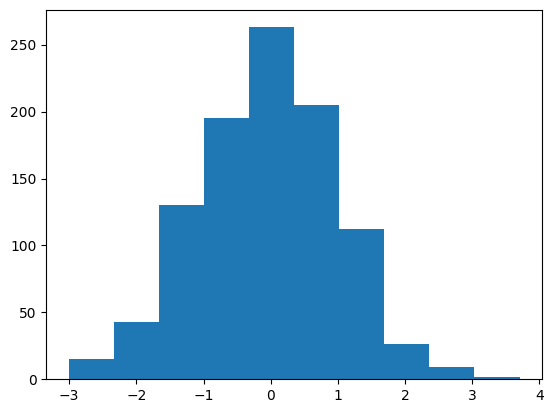

In [ ]:
data = np.random.normal(0, 1, 1000)
plt.hist(data)

# Seaborn
Нужен нам, чтобы делать красивые графики еще быстрее

Сразу рассмотрим несколько задач:

2. Для датасета film_genres_stat.csv показать на графике количество выпускаемых фильмов за год с разбивкой по жанрам, начиная с 2010 года

In [ ]:
df = pd.read_csv('film_genres_stat.csv')
df = df[df['Year'] >= 2010]

In [ ]:
df.head()

,index,Genre,Year,Movies Released,Gross,Tickets Sold,Inflation-Adjusted Gross,Top Movie,Top Movie Gross (That Year),Top Movie Inflation-Adjusted Gross (That Year)
15,15,Adventure,2010.0,44.0,3.202949e+09,372676939.0,3.342912e+09,Toy Story 3,415004880.0,4.331398e+08
16,16,Adventure,2011.0,51.0,2.775702e+09,324520322.0,2.910947e+09,Harry Potter and the Deathly Hallows: Part II,381011219.0,3.995759e+08
17,17,Adventure,2012.0,48.0,3.284292e+09,412599414.0,3.701017e+09,The Hobbit: An Unexpected Journey,263834893.0,2.973114e+08
18,18,Adventure,2013.0,40.0,2.900376e+09,356747331.0,3.200024e+09,The Hunger Games: Catching Fire,407139699.0,4.492027e+08
19,19,Adventure,2014.0,49.0,2.734962e+09,334755123.0,3.002753e+09,The Lego Movie,257784718.0,2.830255e+08


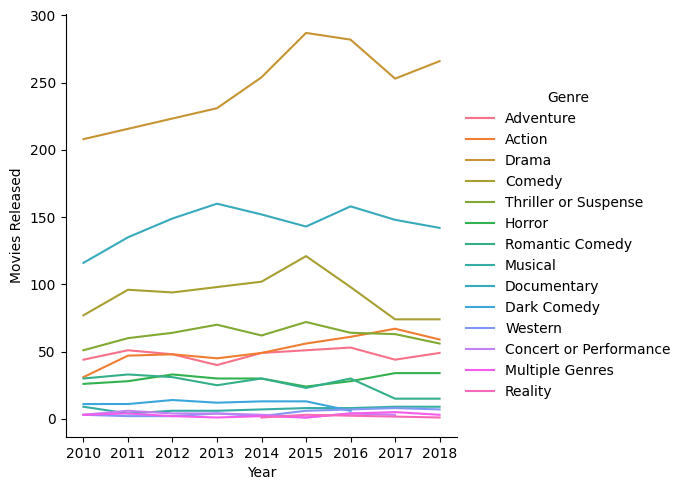

In [ ]:
sns.relplot(data=df, x='Year', y='Movies Released', hue='Genre', kind='line')

3. Для того же датасета создать график общего количества выпущенных фильмов по годам, не применяйте никаких функций к датасету

<Axes: xlabel='Year', ylabel='Movies Released'>

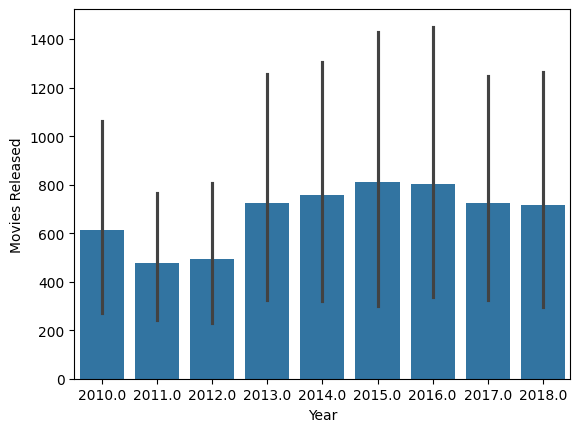

In [ ]:
sns.barplot(data=df, x='Year', y='Movies Released', estimator=np.sum)

4. Для датасета tips из набора seaborn вывести зависимость размера чека и размера оставленных чаевых, учитывая день недели и пол посетителя.

In [ ]:
tips = sns.load_dataset('tips')
tips.sample(5)

,total_bill,tip,sex,smoker,day,time,size
111,7.25,1.0,Female,No,Sat,Dinner,1
73,25.28,5.0,Female,Yes,Sat,Dinner,2
61,13.81,2.0,Male,Yes,Sat,Dinner,2
71,17.07,3.0,Female,No,Sat,Dinner,3
49,18.04,3.0,Male,No,Sun,Dinner,2


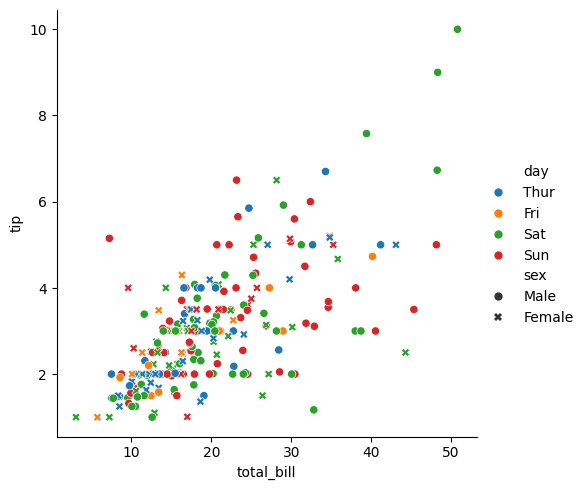

In [ ]:
sns.relplot(data=tips, x='total_bill', y='tip', hue='day', style='sex')

# Проанализируем Dataset

Загрузим датасет с Kaggle (скачать можно [тут](https://www.kaggle.com/code/nileshely/cell-phone-price-insights))

In [ ]:
df = pd.read_csv('CellPhone_train.csv')

In [ ]:
df.sample(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1815,1766,1,0.5,1,1,0,16,0.6,141,5,...,125,1227,3314,9,7,17,0,0,1,3
79,1103,0,1.0,1,6,0,29,0.7,111,6,...,990,1486,1837,8,7,16,0,1,1,1
1269,1512,0,0.6,1,1,1,54,0.4,134,3,...,220,1838,3366,7,3,11,1,0,1,3
1365,1318,0,1.9,1,0,1,11,0.8,188,2,...,688,1591,1780,12,10,2,1,0,0,1
1441,599,1,2.9,0,0,1,64,0.3,186,8,...,103,646,3396,5,3,7,1,0,0,2


In [ ]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

Для начала посмотрим, между какими колонками есть зависимость с ценовой категорией:

<Axes: >

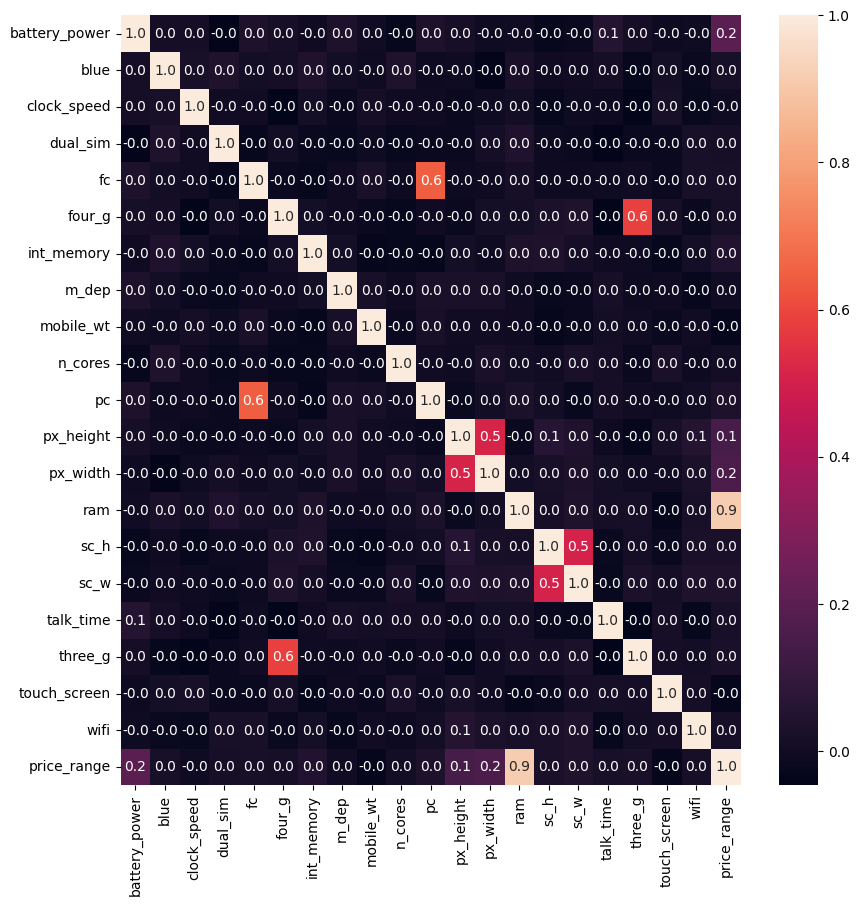

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, fmt='.1f')

Нас будут интересовать следующие параметры: мощность батареи, количество оперативной памяти, разрешение экрана. Посмотрим более подробно на зависимость их и ценовых категорий.


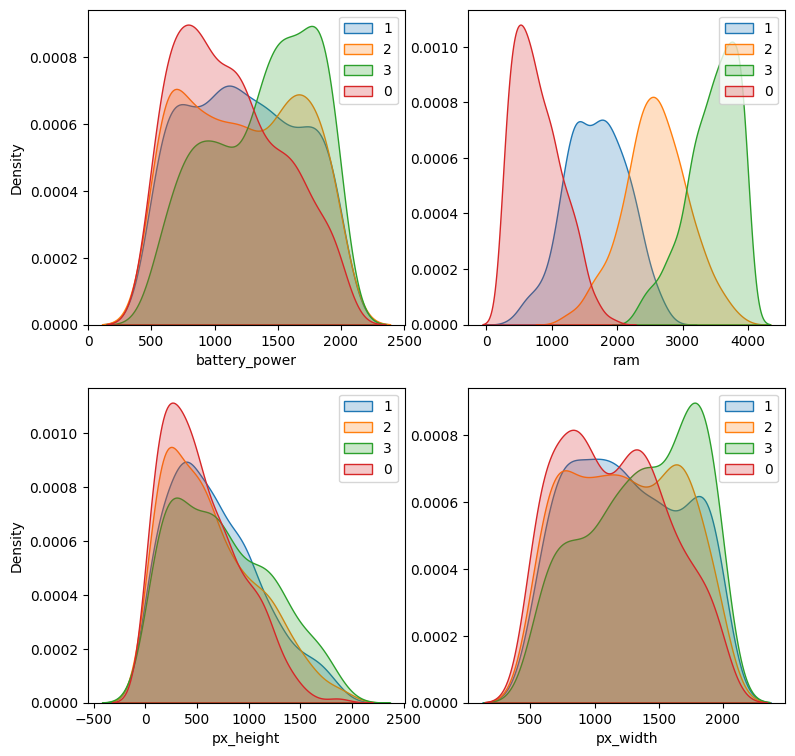

In [ ]:
plt.figure(figsize=(9,9))

for i in df.price_range.unique():
    # subset = df[df['price_range'] == price]

    plt.subplot(2, 2, 1)
    sns.kdeplot(df[df['price_range'] == i]['battery_power'], fill=True,
                 label = i)
    plt.legend()

    plt.subplot(2, 2, 2)
    sns.kdeplot(df[df['price_range'] == i]['ram'], fill=True,
                 label = i)
    plt.ylabel('')
    plt.legend()

    plt.subplot(2, 2, 3)
    sns.kdeplot(df[df['price_range'] == i]['px_height'], fill=True,
                 label = i)
    plt.legend()

    plt.subplot(2, 2, 4)
    sns.kdeplot(df[df['price_range'] == i]['px_width'], fill=True,
                 label = i)
    plt.ylabel('')
    plt.legend()

Text(0.5, 1.0, 'Distibution of bettery power by price range')

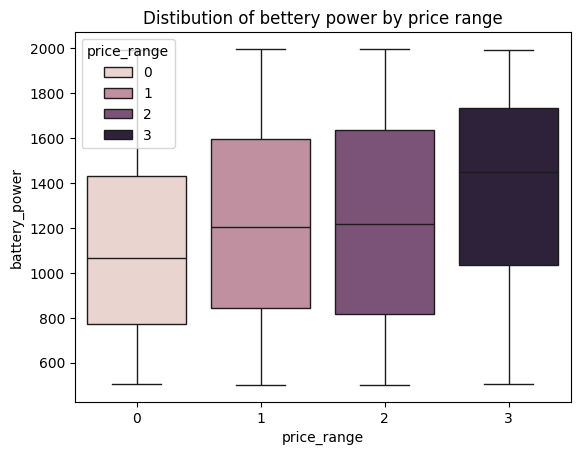

In [ ]:
sns.boxplot(data=df, x='price_range', y="battery_power", hue="price_range")
plt.title('Distibution of bettery power by price range')

Text(0.5, 1.0, 'Distibution of memory by price range')

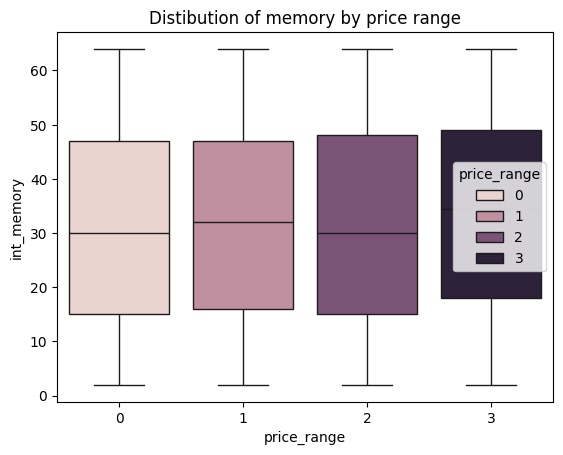

In [ ]:
sns.boxplot(data=df, x='price_range', y="int_memory", hue="price_range")
plt.title('Distibution of memory by price range')

Text(0.5, 1.0, 'Distibution of RAM by price range')

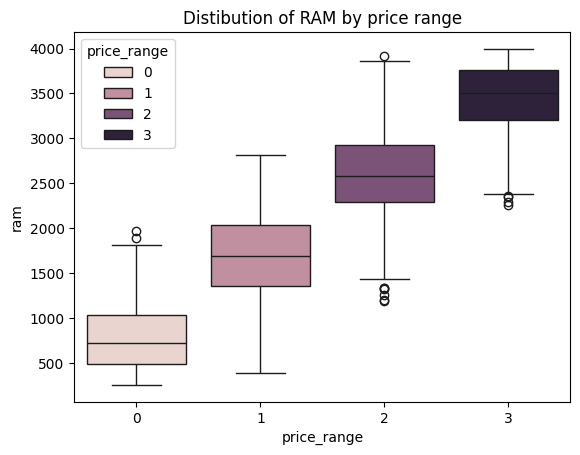

In [ ]:
sns.boxplot(data=df, x='price_range', y="ram", hue="price_range")
plt.title('Distibution of RAM by price range')

Как видим, объем оперативной памяти сильно зависит от ценовой категории смартфона, в то время как объем внутренней памяти почти не зависит от ценовой категории.

>Анализ по другим показателям и выводы предлагается выполнить Вам самим для закрепления пройденного материала.

